<a href="https://colab.research.google.com/github/agterzis/Machine-Learning/blob/main/%CE%9C%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE_%CE%9C%CE%AC%CE%B8%CE%B7%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset

In [43]:
import yfinance as yf
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,0,0.0,0.0
1256,2025-11-05 00:00:00-05:00,100.180000,100.360001,100.059998,100.199997,0,0.0,0.0


In [44]:
# Αφαίρεση των στηλών: Volume, Dividends, Stock Splits

df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df.head()

,Date,Open,High,Low,Close
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999


In [45]:
df.describe()

,Open,High,Low,Close
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,100.745658,101.075006,100.430850,100.758201
std,5.679156,5.741964,5.603379,5.677856
min,89.320000,89.800003,89.209999,89.440002
25%,96.369999,96.617500,96.132498,96.489998
50%,102.285000,102.629997,101.940002,102.285000
75%,104.620003,105.007502,104.252502,104.667500
max,114.190002,114.779999,113.330002,114.110001


# Δημιουργία line-plot

In [46]:
import plotly.express as px

fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'])
fig.show()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Υπολογισμός κινητού μέσου όρου και κινητής διακύμανσης ανά μήνα (30 ημέρες)
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

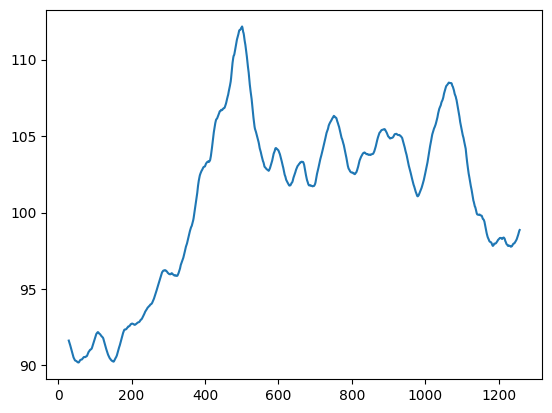

In [48]:
# Εμφάνιση γραφικής παράσταση κινητού μέσου όρου
plt.plot(rolling_mean)

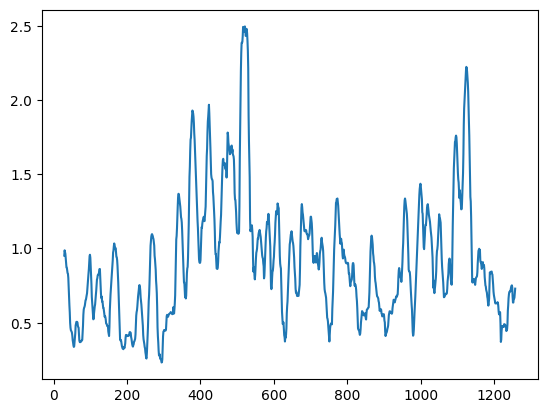

In [49]:
# Εμφάνιση γραφικής παράσταση κινητής διακύμανσης
plt.plot(rolling_std)

Όπως φαίνεται και στα παραπάνω plots, οι τιμές του κινητού μέσου όρου και της κινητής διακύμανσης (ανά μήνα), δεν είναι σταθερές.
Έτσι, καταλαβαίνουμε εύκολα ότι οι χρονοσειρές μας είναι μη-στατικές

Εάν εκπαιδεύσουμε έναν Regressor σε μη στατικές χρονοσειρές, όπως τις παραπάνω, το μοντέλο μας θα μάθει μοτίβα τα οποία δεν είναι αντιπροσωπευτικά.
Πιο συγκεκριμένα, το μοντέλο μας θα βρει συσχετίσεις μεταξύ των σειρών, που στην πραγαμτικότητα δεν υπάρχουν, καθώς και οι δύο επηρρεάζονται από τον χρόνο (τάση, εποχηκότητα, κτλ.)

In [50]:
import plotly.express as px

fig = px.line(df, x='Date', y=['Close'])
fig.show()

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Φιλτράρουμε τα δεδομένα για τον Οκτώβριο του 2024
june_july_2025_data = df[(df['Date'] >= '2025-06-01') & (df['Date'] <= '2025-07-31')]

# Εμφάνιση στατιστικών
print("Πρώτες 5 ημέρες:")
print(june_july_2025_data[['Date', 'Close']].head())
print("Τελευταίες 5 ημέρες:")
print(june_july_2025_data[['Date', 'Close']].tail())
print("\nΣτατιστικά για την τιμή 'Close' (Ιούνιος-Ιούλιος 2025):")
print(june_july_2025_data['Close'].describe())

Πρώτες 5 ημέρες:
                          Date      Close
1147 2025-06-02 00:00:00-04:00  98.699997
1148 2025-06-03 00:00:00-04:00  99.250000
1149 2025-06-04 00:00:00-04:00  98.790001
1150 2025-06-05 00:00:00-04:00  98.739998
1151 2025-06-06 00:00:00-04:00  99.190002
Τελευταίες 5 ημέρες:
                          Date       Close
1184 2025-07-25 00:00:00-04:00   97.650002
1185 2025-07-28 00:00:00-04:00   98.660004
1186 2025-07-29 00:00:00-04:00   98.910004
1187 2025-07-30 00:00:00-04:00   99.940002
1188 2025-07-31 00:00:00-04:00  100.029999

Στατιστικά για την τιμή 'Close' (Ιούνιος-Ιούλιος 2025):
count     42.000000
mean      98.173334
std        0.810146
min       96.779999
25%       97.487503
50%       98.130001
75%       98.737499
max      100.029999
Name: Close, dtype: float64


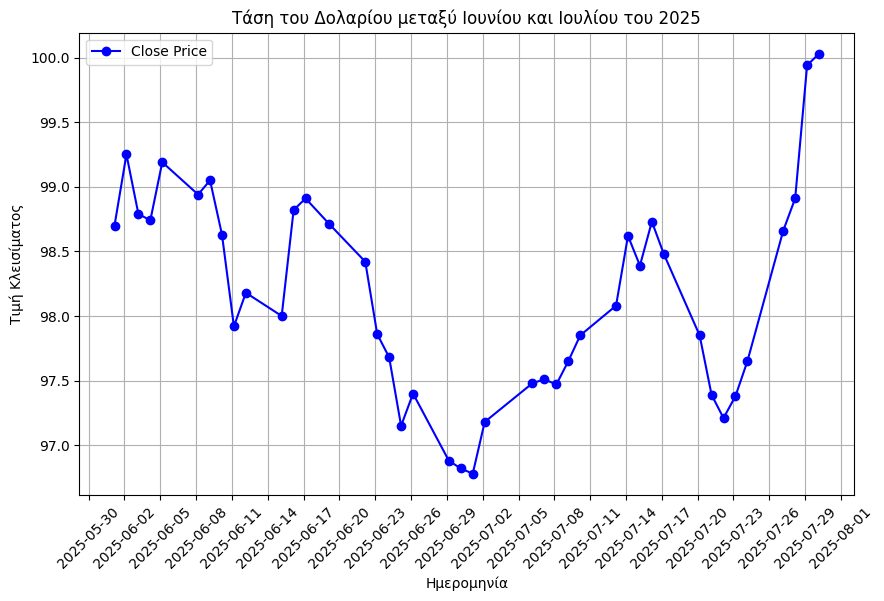

In [52]:

# Γραφική απεικόνιση της τάσης της τιμής Close για τον Οκτώβριο του 2024
plt.figure(figsize=(10, 6))
plt.plot(june_july_2025_data['Date'], june_july_2025_data['Close'], marker='o', color='b', label='Close Price')

# Ρυθμίσεις για τον άξονα x
plt.title("Τάση του Δολαρίου μεταξύ Ιουνίου και Ιουλίου του 2025")
plt.xlabel("Ημερομηνία")
plt.ylabel("Τιμή Κλεισίματος")
plt.legend()
plt.grid(True)

# Περιστροφή ετικετών και ρύθμιση απόστασης
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Εμφανίζει ετικέτες κάθε 3 ημέρες

plt.show()

Όπως φαίνεται στο γράφημα και στα στατιστικά, η τάση του δολαρίου μεταξύ Ιουνίου και Ιουλίου 2025 δεν ήταν γραμμική. Αντιθέτως, παρουσίασε έντονη μεταβλητότητα.

Αρχές Ιουνίου: Η τιμή ξεκινά σχετικά ψηλά, γύρω στο 98.7 - 99.2
Στη συνέχεια φαίνεται ότι η τιμή έφτασε σε ελάχιστο στα 96.77, στις 29 Ιουνίου.
Στις 31 Ιουλίου, η τιμή φτάνει στο μέγιστο στα ~ 100.03

Στη συνεδρίασή της Fed (Federal Reserve) στις 17-18 Ιουνίου 2025, δημοσίευτηκαν οι προβλέψεις των μελών της, που έδειχναν ότι σχεδίαζαν δύο μειώσεις επιτοκίων μέχρι το τέλος του 2025. Το δολάριο έτσι έγινε λιγότερο ελκυστικό για επενδύσεις και έπεσε η αξια του.

Στις 15 Ιουλίου, ανακοινώθηκαν τα στοιχεία για τον πληθωρισμό του Ιουνίου. Αυτά έδειξαν ότι ο πληθωρισμός αυξήθηκε ελαφρώς.
Η Fed, βλέποντας ότι ο πληθωρισμός αυξήθηκε, στη συνεδρίασή της στο τέλος
Ιουλίου αποφάσισε να κρατήσει ξανά τα επιτόκια σταθερά.
Αυτή η τάση έκανε το δολάριο ξανά ελκυστικό και προκάλεσε την απότομη ανάκαμψη.

**Πρόβλεψη τιμής της επόμενης ημέρας**


Γνωρίζοντας μόνο τις τιμές Open, High, Low, και Close της σημερινής ημέρας, μπορούμε να προβλέψουμε την τιμή (close) της αυριανής ημέρας, αλλά η πρόβλεψη δεν είναι καθόλου αντιπροσωπευτική.
Υπάρχουν πολλοί άλλοι παράγοντες που επηρεάζουν την τιμή αυτή και όχι μόνο οι χθεσινές τιμές.
Αν έχουμε όμως τις τιμές πολλών προηγούμενων ημερών (όπως στο dataset μας) μπορούμε να κάνουμε πολύ καλύτερη πρόβλεψη, ελαχιστοποιοώντας το σφάλμα και με σίγουρα καλύτερο εύρος πιθανών τιμών.

**Τυχαίος διαχωρισμός των δεδομένων**

Δεν έχει κανένα νόημα να κάνομε τυχαίο διαχωρισμό των δεδομένων (train-test) καθώς ο κυριότερος παράγοντας στις χρονοσειρές, είναι ο χρόνος.
Οπότε, είναι απαραίτηες οι τιμές της κάθε ημέρας.

# Διαχωρισμός δεδομένων σε train-test dataframes

In [53]:
# Διαχωρισμός train-test βάση του έτους 2024
train_df = df[df['Date'].dt.year < 2024].copy()
test_df = df[df['Date'].dt.year == 2024].copy()

# Αφαίρεση της στήλης Date
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

# Εμφάνιση των head και shape των dataframes
print("Train DataFrame")
print(train_df.head())
print(f"\nShape of train_df: {train_df.shape}")

print("\n Test DataFrame")
print(test_df.head())
print(f"\nShape of test_df: {test_df.shape}")

Train DataFrame
        Open       High        Low      Close
0  92.570000  92.820000  92.180000  92.230003
1  92.239998  92.959999  92.129997  92.730003
2  92.760002  92.970001  92.599998  92.750000
3  92.699997  93.209999  92.610001  93.040001
4  93.010002  93.139999  92.779999  92.959999

Shape of train_df: (791, 4)

 Test DataFrame
           Open        High         Low       Close
791  101.419998  102.250000  101.339996  102.199997
792  102.150002  102.730003  102.080002  102.459999
793  102.459999  102.529999  102.150002  102.419998
794  102.400002  103.099998  101.910004  102.410004
795  102.440002  102.620003  102.080002  102.209999

Shape of test_df: (252, 4)


In [54]:
import numpy as np

def create_numpy_arrays(df, n):
  inputs = []

  # Μετατροπή σε numpy array για ταχύτητα
  np_array = df.to_numpy()

  # Κάν
  for i in range(len(np_array) - n):
      # Παίρνουμε ένα παράθυρο n γραμμών (από i έως i+n-1)
      x_frame = np_array[i : i + n]
      inputs.append(x_frame)

  # Μετατροπή της λίστας σε numpy array
  x = np.array(inputs)

  # Δημιουργούμε τα Targets (y) με την shift της pandas
  # Το shift(-n) μετακινεί τις τιμές 'n' θέσεις "προς τα πάνω".
  all_y = df['Close'].shift(-n)

  # Κρατάμε μόνο τα 'y' που αντιστοιχούν στα 'x' που φτιάξαμε.
  # Το x έχει 'len(np_array) - n' δείγματα.
  y = all_y.iloc[:len(x)].to_numpy()

  print(f"Shape X: {x.shape}, Shape y: {y.shape}")
  return x, y

In [55]:
# Δημιουργία x_train, y_train, x_test, y_test για Ν = 4

X_train, y_train = create_numpy_arrays(train_df,4)

# Το shape είναι σωστά 788, καθώς το train_df ήταν 792
# Η τελευταίες 4 γραμμές δεν μπορούν να γίνουν array, καθώς δεν θα έχουν target (y)

Shape X: (787, 4, 4), Shape y: (787,)


# Μικρό vs Μεγάλο Ν μέγεθος timeframe

Για να προβλέψουμε την τιμή Close, τις επόμενης ημέρας, είναι καλύτερο να χρησιμοποιοήσουμε μικρό αριθμό Ν, για να πάρει τις κρίσιμες πληροφορίες (παράγοντες) μόνο των τελευταίων ημερών, οι οποίες κυρίως καθορίζουν την τιμή της επόμενης ημέρας. Αν είχαμε δεδομένα πολλών ημερών, το μοντέλο δεν θα εστίαζε στις τελευταίες ημέρες, οπότε οι κρίσιμες πληροφορίες θα χάνονταν.

Από την άλλη, αν θέλουμε να προβλέψουμε τις τιμές Close για πιο μακρινό ορίζοντα, θα ήταν καλύτερο να έχουμε μεγαλύτερο Ν, ώστε να πάρουμε πληροφορίες όπως η τάση, η εποχηκότητα και η κυκλικότητα.
Ένα μικρό Ν, θα μας κρατούσε κυρίως "θόρυβο", από τις τελευταίες ημέρες και όχι παράγοντες που υπάρχουν εδώ και πολλούς μήνες ή και χρόνια.

# Δημιουργία x_train, y_train, x_test, y_test για Ν = 5

In [56]:
N = 5

# Δημιουργία των αρχικών 5 Χ 4 arrays
X_train, y_train = create_numpy_arrays(train_df, N)
X_test, y_test = create_numpy_arrays(test_df, N)

# Μετατροπή των numpy arrays (X) σε διάνυσμα διάστασης N * X_train.shape[2], δηλαδή 5 Χ 4
num_features = N * X_train.shape[2]

# Reshape X_train
X_train = X_train.reshape(X_train.shape[0], num_features)

# Reshape X_test
X_test = X_test.reshape(X_test.shape[0], num_features)

# Εμφάνιση μεγέθους (πλήθος)
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Έλεγχος πλήθους x και y
print(f"\nX_train: {X_train.shape[0]}")
print(f"\nX_train: {y_train.shape[0]}")
print(f"\nX_train: {X_test.shape[0]}")
print(f"\nX_train: {y_test.shape[0]}")

# Έλεγχος preprocessing (1ο input του x_train)
print(f"\n X_train[0] {X_train[0]}")
print(f"\n y_train[0] {y_train[0]}")

Shape X: (786, 5, 4), Shape y: (786,)
Shape X: (247, 5, 4), Shape y: (247,)

X_train shape: (786, 20)
X_test shape: (247, 20)

X_train: 786

X_train: 786

X_train: 247

X_train: 247

 X_train[0] [92.56999969 92.81999969 92.18000031 92.23000336 92.23999786 92.95999908
 92.12999725 92.73000336 92.76000214 92.97000122 92.59999847 92.75
 92.69999695 93.20999908 92.61000061 93.04000092 93.01000214 93.13999939
 92.77999878 92.95999908]

 y_train[0] 92.76000213623047


# Δημιουργία και αξιολόγηση μοντέλων

In [57]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_test_pred_lr = model_lr.predict(X_test)
y_train_pred_lr = model_lr.predict(X_train)


# Υπολογισμός MAE
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)

mae_results = {}
mae_results['Linear Reg'] = {'train': mae_train_lr, 'test': mae_test_lr}

print(f"MAE (Train) για Linear Regression: {mae_train_lr:.4f}")
print(f"MAE (Test)  για Linear Regression: {mae_test_lr:.4f}")

MAE (Train) για Linear Regression: 0.3458
MAE (Test)  για Linear Regression: 0.2846


In [58]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=0)
model_rf.fit(X_train, y_train)

y_test_pred_rf = model_rf.predict(X_test)
y_train_pred_rf = model_rf.predict(X_train)


mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)

mae_results['Random Forest'] = {'train': mae_train_rf, 'test': mae_test_rf}

print(f"MAE (Train) για Random Forest: {mae_train_rf:.4f}")
print(f"MAE (Test)  για Random Forest: {mae_test_rf:.4f}")

MAE (Train) για Random Forest: 0.1474
MAE (Test)  για Random Forest: 0.3250


In [59]:
from sklearn.ensemble import BaggingRegressor

model_bg = BaggingRegressor(estimator=LinearRegression(),
    random_state=0)
model_bg.fit(X_train, y_train)

y_test_pred_bg = model_bg.predict(X_test)
y_train_pred_bg = model_bg.predict(X_train)

mae_test_bg = mean_absolute_error(y_test, y_test_pred_bg)
mae_train_bg = mean_absolute_error(y_train, y_train_pred_bg)

mae_results['Bagging (LR)'] = {'train': mae_train_bg, 'test': mae_test_bg}

print(f"MAE (Train) για Bagging (LR): {mae_train_bg:.4f}")
print(f"MAE (Test)  για Bagging (LR): {mae_test_bg:.4f}")

MAE (Train) για Bagging (LR): 0.3468
MAE (Test)  για Bagging (LR): 0.2847


In [60]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor

# Ορισμός estimators (Level 0 models)
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42))
]

model_stack = StackingRegressor(
    estimators=estimators
)
model_stack.fit(X_train, y_train)

y_train_pred_stack = model_stack.predict(X_train)
y_test_pred_stack = model_stack.predict(X_test)

mae_train_stack = mean_absolute_error(y_train, y_train_pred_stack)
mae_test_stack = mean_absolute_error(y_test, y_test_pred_stack)

mae_results['Stacking (LR+DT)'] = {'train': mae_train_stack, 'test': mae_test_stack}

print(f"MAE (Train) για Stacking (LR+DT): {mae_train_stack:.4f}")
print(f"MAE (Test)  για Stacking (LR+DT): {mae_test_stack:.4f}")

MAE (Train) για Stacking (LR+DT): 0.3546
MAE (Test)  για Stacking (LR+DT): 0.2869


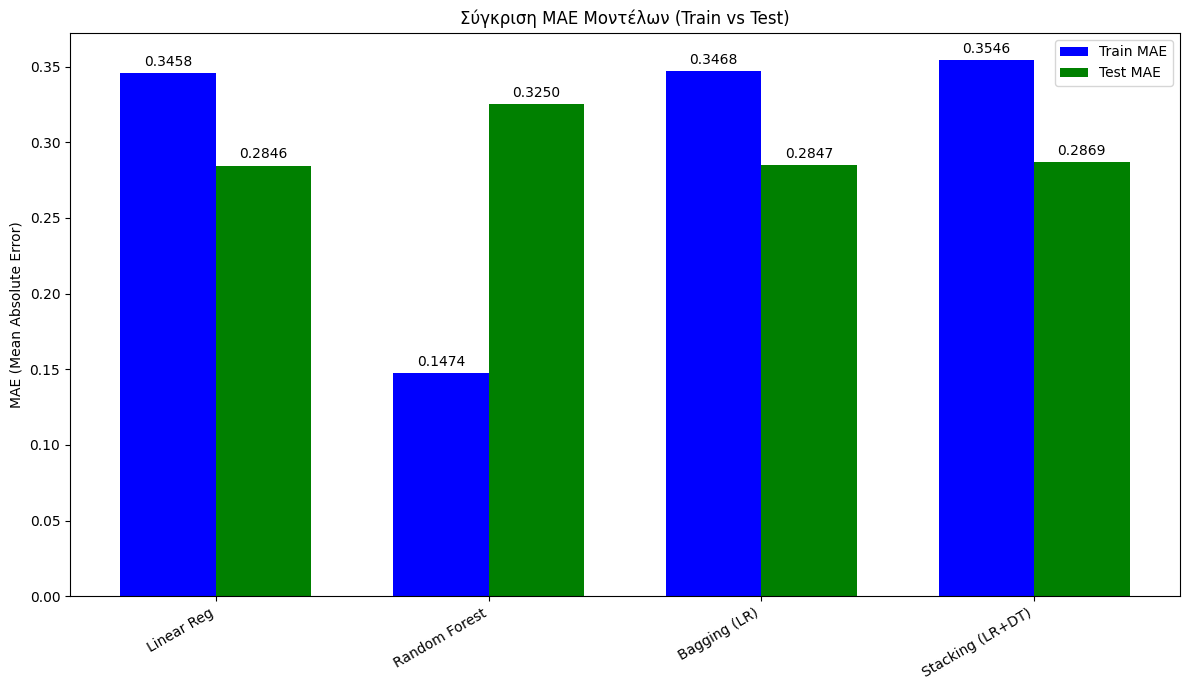

In [61]:
# Δημιουργία Γραφήματος Σύγκρισης MAE

import matplotlib.pyplot as plt
import numpy as np

labels = list(mae_results.keys())

train_maes = [d['train'] for d in mae_results.values()]
test_maes = [d['test'] for d in mae_results.values()]

x = np.arange(len(labels))  # θέσεις των ετικετών
width = 0.35  # πλάτος της μπάρας

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, train_maes, width, label='Train MAE', color='blue')
rects2 = ax.bar(x + width/2, test_maes, width, label='Test MAE', color='green')

ax.set_ylabel('MAE (Mean Absolute Error)')
ax.set_title('Σύγκριση MAE Μοντέλων (Train vs Test)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')

fig.tight_layout()
plt.show()

**Linear Regression**: Χρησιμοποιεί μια γραμμική προσέγγιση για την πρόβλεψη της τιμής του στόχου, προσπαθώντας να βρει την καλύτερη ευθεία που ταιριάζει στα δεδομένα.

**Random Forest Regressor**: Δημιουργεί ένα δάσος από πολλά ανεξάρτητα Δέντρα Αποφάσεων. Κάθε δέντρο εκπαιδεύεται σε ένα τυχαίο

**Bagging (με LR)**: Δημιουργεί διαφορετικά τυχαία δείγματα (**bootstrap**) και εκπαιδεύει ένα **Linear Regression** στο καθένα, επιστρέφοντας τον μέσο όρο των προβλέψεων.

**Stacking (με LR+DT)**: Συνδυάζει προβλέψεις από τα  μοντέλα Linear Regression & Decision Tree και χρησιμοποιεί τις προβλέψεις τους ως "νέα features" για να εκπαιδεύσει ένα τελικό "μετα-μοντέλο" (Level 1) για τη βελτίωση της ακρίβειας.


Αποτελέσματα:
Το Random Forest έδειξε κλασική περίπτωση overfitting: αποστήθισε τα δεδομένα εκπαίδευσης, πολύ χαμηλό MAE στο train, αλλά απέτυχε να γενικεύσει σε νέα δεδομένα (υψηλότερο MAE στο test).

Το απλό Linear Regression πέτυχε το χαμηλότερο σφάλμα στο test set, αποδεικνύοντας ότι γενικεύει καλύτερα.

Οι τεχνικές Bagging και Stacking δεν πρόσφεραν κάποια βελτίωση, καθώς το Linear Regression είναι ήδη ένα σταθερό μοντέλο και το πρόβλημα φαίνεται να είναι γραμμικό στη φύση του.